<a href="https://colab.research.google.com/github/Fatemah-Husain/Text-Classification-Basics-Workshop/blob/main/Text_Classification_Basics_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For more information about the workshop, please check this GitHub repository https://github.com/Fatemah-Husain


This workshop covers the basics of text classification with a focus on processing and analyzing the Arabic text. Text classification includes several tasks, however, in this workshop we focus on text classification for offensive language detection. This Colab project includes the script used during the workshop. The followings are the main steps required to develop the classification system:



1.   Reading dataset
2. Exploratory data analysis
3.   Text preprocessing
4. Preparing the dataset
5. Classification model development
6. Performance evaluation
7. Error analysis


## **Step 1: Reading Dataset**

In [ ]:
# Libraries needed to read the files
import pandas as pd

# Reading the dataset
dataset = pd.read_csv("/content/Offensive_Version_Final.csv")

# Viewing the data to check its format
dataset

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,Offensive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,Non-Offensive
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,Non-Offensive
3,وليد جنبلاط كاتب الحكمة يا قذر,Offensive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,Offensive
...,...,...
15865,رحماك رب رحماك رب التوانسة ولات تناقش القرأن ت...,Despise
15866,إنسان تافه وكلام فارغ تفوووو كلب,Offensive
15867,مريم معجبييك مي تحتي عيني قناة عادة مكروها ونط...,Non-Offensive
15868,نكره امها,Despise


## **Step 2: Exploratory Data Analysis**

In this step, we will analyze the data to better understand its content. The following tasks are included in this step:

1. Counting the number of words per tweet.
2. Counting the number of characters per tweet.
3. The average number of characters per word.
4. Counting the number of stop words per tweet.
5. Counting the number of emoji per tweet.
6. Overall dataset statistics.

In [ ]:
dataset.isnull().sum()

Tweet    0
Class    0
dtype: int64

In [ ]:
dataset['Class'].unique()

array(['Offensive', 'Non-Offensive', 'Despise'], dtype=object)

In [ ]:

mapping_dict = {'Offensive': 1, 'Non-Offensive': 0, 'Despise': 2}

# Utilisez la méthode replace pour mapper les valeurs
dataset['Class'] = dataset['Class'].replace(mapping_dict)


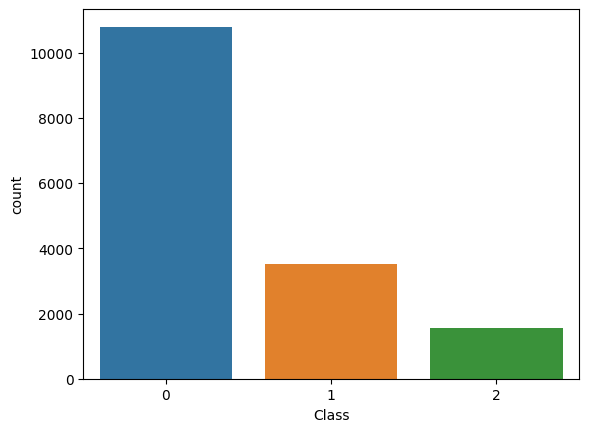

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Tracer le countplot
sns.countplot(x='Class', data=dataset)
plt.show()


In [ ]:
dataset['Class'].unique()

array([1, 0, 2])

In [ ]:
dataset[dataset['Class']==0]

,Tweet,Class
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,0
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,0
5,يا جبران باسيل يا معلم يا ريس يا استاذ بدك حضن...,0
7,نصيحة احكي مع الرئيس ميشال عون او هاجم جبران ب...,0
11,مش عم يناموا الليل ليقدمولنا حكومة,0
...,...,...
15856,باللهي مذكورة بجيبولن دين اجديد علامات الساعة ...,0
15858,رائس الحطبة,0
15864,تكفرو جميعا ينقص ملك شيئ غني حميد,0
15867,مريم معجبييك مي تحتي عيني قناة عادة مكروها ونط...,0


In [ ]:
dataset["Class"].replace({2: 1}, inplace=True)

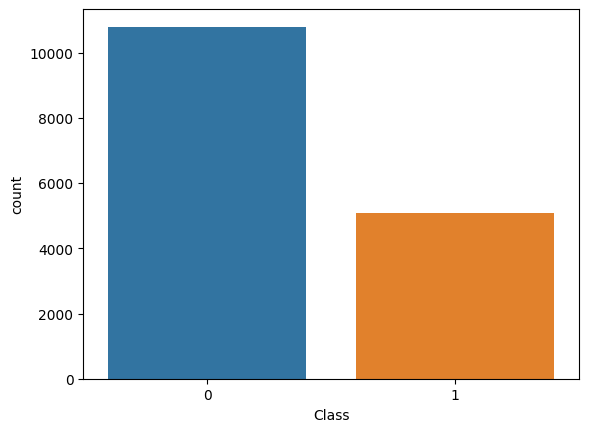

In [ ]:
sns.countplot(x='Class', data=dataset)
plt.show()

In [ ]:
dataset.iloc[1937]['Tweet']

'آه يا هبيلي'

In [ ]:
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("arabic")
from nltk.corpus import stopwords
import string
stop=set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text): #pré-traitement initiale
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stop]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
dataset['Tweet']=dataset['Tweet'].apply(clean_text)

In [ ]:
dataset.to_csv('Clean1_Off.csv', index=False)

In [ ]:

nltk.download('stopwords')
# stop = set(nltk.corpus.stopwords.words("arabic"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Required libraries
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
import emoji

stop = set(nltk.corpus.stopwords.words("arabic"))
#from nltk.corpus import stopwords


# Text length analysis
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

# Counting emoji
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

dataset['word_count'] = dataset['Tweet'].apply(lambda x: len(str(x).split(" ")))
dataset['char_count'] = dataset['Tweet'].str.len() ## this also includes spaces
dataset['avg_char_per_word'] = dataset['Tweet'].apply(lambda x: avg_word(x))
#stop = stopwords.words('arabic')
dataset['stopwords'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset['emoji_count'] = dataset['Tweet'].apply(lambda x: emoji_counter(x))
dataset = dataset.sort_values(by='word_count',ascending=[0])
dataset.head()

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count
6007,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء...,0,501,2294,3.646341,27,0
8592,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...,0,500,2238,3.484970,34,0
6731,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...,0,450,1785,3.763380,9,2
7587,✅نبذ طريق كركر ⬅ يقول شيخ سيد محمد فوز كركر 《...,0,421,1960,3.774510,20,15
13181,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...,0,383,1877,3.903394,20,0


In [ ]:
# Overall averages of each numeric column
dataset_stat = dataset.mean(axis=0)
dataset_stat

<ipython-input-18-ad2c9917dd3f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_stat = dataset.mean(axis=0)


Class                 0.319786
word_count           13.317013
char_count           59.447952
avg_char_per_word     3.742533
stopwords             0.423629
emoji_count           0.155198
dtype: float64

To further understand the content, we can download the data at this point and manually investigate it content before preprocessing.

In [ ]:
# to download the dataset
from google.colab import files

dataset.to_csv('output.csv', encoding = 'utf-8-sig')
# files.download('output.csv')

From the manual inspection, we can say that there are no retweets (RT), no mentions (@), and no hashtags (#). Thus, we will select the preprocessing techniques that better fit our task and dataset.

## **Step 3: Text Preprocessing**

We perform basic text preprocessing steps including the following:

1. Stop words removal
2. Normalization
3. Removing punctuations
4. Converting emoji
5. Noise removal


**Stop Words Removal:**

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))

def stopRemoval(text):
    temptweet = word_tokenize(text)
    text = " ".join([w for w in temptweet if not w in stop and len(w) >= 2])
    return text

dataset['noStop_tweet'] = dataset['Tweet'].apply(lambda x:stopRemoval(x))
dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet
6007,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء...,0,501,2294,3.646341,27,0,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء ف...
8592,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...,0,500,2238,3.484970,34,0,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...
6731,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...,0,450,1785,3.763380,9,2,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...
7587,✅نبذ طريق كركر ⬅ يقول شيخ سيد محمد فوز كركر 《...,0,421,1960,3.774510,20,15,✅نبذ طريق كركر يقول شيخ سيد محمد فوز كركر 《طري...
13181,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...,0,383,1877,3.903394,20,0,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...
...,...,...,...,...,...,...,...,...
12743,الاه,0,1,4,4.000000,0,0,الاه
10089,مجدب,0,1,4,4.000000,0,0,مجدب
3638,عاه,1,1,3,3.000000,0,0,عاه
10103,دخل,0,1,3,3.000000,0,0,دخل


**Normalization:**

In [ ]:
# Required libraries
import re

def normalize(text):
    # remove three or more repetitions of any character
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text=pattern.sub(r"\1\1", text)
    # normalize alif
    text = text.replace(u"\u0625", u"\u0627")  # HAMZA below, with LETTER ALEF
    #text = text.replace(u"\u0621", u"\u0627")  # HAMZA, with LETTER ALEF
    text = text.replace(u"\u0622", u"\u0627")  # ALEF WITH MADDA ABOVE, with LETTER ALEF
    text = text.replace(u"\u0623", u"\u0627")  # ALEF WITH HAMZA ABOVE, with LETTER ALEF
    # normalize taa
    text=text.replace(u"\u0629", u"\u0647") # taa' marbuuTa, with haa'
    # normalize yaa
    text = text.replace(u"\u064A", u"\u0649")  # yaa' with 'alif maqSuura
    # remove diacritics
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif
    return text

dataset['normalized_tweet'] = dataset['Tweet'].apply(lambda x: normalize(x))

# aggregate all preprocessing steps into one column for the next step
dataset['text'] = dataset['noStop_tweet'].apply(lambda x:normalize(x))

dataset.head()

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text
6007,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء...,0,501,2294,3.646341,27,0,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء ف...,كنت عربى مسلم بحق ساهم فى نشر هىل توماس… مرء...,كنت عربى مسلم بحق ساهم فى نشر هىل توماس… مرء ف...
8592,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...,0,500,2238,3.484970,34,0,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...,احس ان الله عز وجل حرم انتحار لان عز وجل ىمتح ...,احس ان الله عز وجل حرم انتحار لان عز وجل ىمتح ...
6731,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...,0,450,1785,3.763380,9,2,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...,حوار مترجم المان رافق كرد سور اثناء تقدىم طلب ...,حوار مترجم المان رافق كرد سور اثناء تقدىم طلب ...
7587,✅نبذ طريق كركر ⬅ يقول شيخ سيد محمد فوز كركر 《...,0,421,1960,3.774510,20,15,✅نبذ طريق كركر يقول شيخ سيد محمد فوز كركر 《طري...,✅نبذ طرىق كركر ⬅ ىقول شىخ سىد محمد فوز كركر 《...,✅نبذ طرىق كركر ىقول شىخ سىد محمد فوز كركر 《طرى...
13181,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...,0,383,1877,3.903394,20,0,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...,صد امال اقرء تعلىق سمح صدق صدق القض اوسع تتخىل...,صد امال اقرء تعلىق سمح صدق صدق القض اوسع تتخىل...


**Removing Punctuations**

In [ ]:
# Required libraries
import string
import re

arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
englishPunctuations = string.punctuation # importing English punctuation marks
englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
punctuationsList = arabicPunctuations + englishPunctuations # creating a list of all punctuation marks

def removingPunctuation(text):
  cleanTweet = ''
  for i in text:
    if i not in arabicPunctuations:
      cleanTweet = cleanTweet + '' + i
  return cleanTweet

dataset['noPunc_tweet'] = dataset['Tweet'].apply(lambda x: removingPunctuation(x))
dataset['text'] = dataset['text'].apply(lambda x: removingPunctuation(x))


dataset.sample(5)


,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet
7646,useridx اعداد محتوى انتاج اخراج شئ خراف شكر خا...,0,18,86,4.058824,0,0,useridx اعداد محتوى انتاج اخراج شئ خراف شكر خا...,useridx اعداد محتوى انتاج اخراج شئ خراف شكر خا...,useridx اعداد محتوى انتاج اخراج شئ خراف شكر خا...,useridx اعداد محتوى انتاج اخراج شئ خراف شكر خا...
1739,يجب دعاء نزول نيزك بعد ظهور شعب جديد,0,9,37,3.625000,1,0,يجب دعاء نزول نيزك ظهور شعب جديد,ىجب دعاء نزول نىزك بعد ظهور شعب جدىد,ىجب دعاء نزول نىزك ظهور شعب جدىد,يجب دعاء نزول نيزك بعد ظهور شعب جديد
4451,هلق اذا يدفعل دولر ماش حال مرقل ياه,0,10,37,3.500000,0,0,هلق اذا يدفعل دولر ماش حال مرقل ياه,هلق اذا ىدفعل دولر ماش حال مرقل ىاه,هلق اذا ىدفعل دولر ماش حال مرقل ىاه,هلق اذا يدفعل دولر ماش حال مرقل ياه
3627,ههههه قم مهزل قم جبرا اسيل فاشل,0,7,31,3.571429,0,0,ههههه قم مهزل قم جبرا اسيل فاشل,هه قم مهزل قم جبرا اسىل فاشل,هه قم مهزل قم جبرا اسىل فاشل,ههههه قم مهزل قم جبرا اسيل فاشل
15228,تحسوش لحكا لهت شعب,0,4,18,3.750000,0,0,تحسوش لحكا لهت شعب,تحسوش لحكا لهت شعب,تحسوش لحكا لهت شعب,تحسوش لحكا لهت شعب


**Converting Emoji**

This step is borrowed from this GitHub repository

https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb

You will need to download the file emoji.csv from this repository and upload it to this Colab or you can also fork the GitHub repository into this Colab project if you are familiar with using GitHub in Colab.

During this step emoji is translated from a pictogram to an Arabic text that explain its content.

In [ ]:
 with open('/content/emojis.csv','r',encoding='utf-8') as f:
    lines = f.readlines()
    emojis_ar = {}
    for line in lines:
        line = line.strip('\n').split(';')
        emojis_ar.update({line[0].strip():line[1].strip()})

In [ ]:
from __future__ import unicode_literals # must be in the begining of the file

# Required libraries
!pip install unidecode
!pip install aiogoogletrans
!pip install emoji
import unicodedata
from unidecode import unidecode
import emoji
from aiogoogletrans import Translator
translator = Translator()
import asyncio
loop = asyncio.get_event_loop()


def remove_emoji(text):
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text



def emoji_native_translation(text):
    text = text.lower()
    loves = ["<3", "♥",'❤']
    smilefaces = []
    sadfaces = []
    neutralfaces = []

    eyes = ["8",":","=",";"]
    nose = ["'","`","-",r"\\"]
    for e in eyes:
        for n in nose:
            for s in ["\)", "d", "]", "}","p"]:
                smilefaces.append(e+n+s)
                smilefaces.append(e+s)
            for s in ["\(", "\[", "{"]:
                sadfaces.append(e+n+s)
                sadfaces.append(e+s)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(e+n+s)
                neutralfaces.append(e+s)
            #reversed
            for s in ["\(", "\[", "{"]:
                smilefaces.append(s+n+e)
                smilefaces.append(s+e)
            for s in ["\)", "\]", "}"]:
                sadfaces.append(s+n+e)
                sadfaces.append(s+e)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(s+n+e)
                neutralfaces.append(s+e)

    smilefaces = list(set(smilefaces))
    sadfaces = list(set(sadfaces))
    neutralfaces = list(set(neutralfaces))
    t = []
    for w in text.split():
        if w in loves:
            t.append("حب")
        elif w in smilefaces:
            t.append("مضحك")
        elif w in neutralfaces:
            t.append("عادي")
        elif w in sadfaces:
            t.append("محزن")
        else:
            t.append(w)
    newText = " ".join(t)
    return newText

def is_emoji(word):
    if word in emojis_ar:
        return True
    else:
        return False

def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

def translate_emojis(words):
    word_list = list()
    words_to_translate = list()
    for word in words :
        t = emojis_ar.get(word.get('emoji'),None)
        if t is None:
            word.update({'translation':'عادي','translated':True})
            #words_to_translate.append('normal')
        else:
            word.update({'translated':False,'translation':t})
            words_to_translate.append(t.replace(':','').replace('_',' '))
        word_list.append(word)
    return word_list

def emoji_unicode_translation(text):
    text = add_space(text)
    words = text.split()
    text_list = list()
    emojis_list = list()
    c = 0
    for word in words:
        if is_emoji(word):
            emojis_list.append({'emoji':word,'emplacement':c})
        else:
            text_list.append(word)
        c+=1
    emojis_translated = translate_emojis(emojis_list)
    for em in emojis_translated:
        text_list.insert(em.get('emplacement'),em.get('translation'))
    text = " ".join(text_list)
    return text

def clean_emoji(text):
    text = emoji_native_translation(text)
    text = emoji_unicode_translation(text)
    return text

dataset['cleanEmoji_tweet'] = dataset['Tweet'].apply(lambda x: clean_emoji(x))
dataset['text'] = dataset['text'].apply(lambda x: clean_emoji(x))


dataset.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.9 MB/s eta 0:00:00
  Created wheel for aiogoogletrans: filename=aiogoogletrans-3.3.3-py3-none-any.whl size=15697 sha256=902d62cbfe66abfaeac10b4f905d00a921faa14823c9fd348d7619d16dfd532e
  Stored in directory: /root/.cache/pip/wheels/91/c6/51/523daee3f1a16a150f0ca6ac9d449ca6ff785682e7fc68a9ca
Successfully built aiogoogletrans


,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet
6007,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء...,0,501,2294,3.646341,27,0,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء ف...,كنت عربى مسلم بحق ساهم فى نشر هىل توماس… مرء...,كنت عربى مسلم بحق ساهم فى نشر هىل توماس مرء فض...,كنت عربى مسلم بحق ساهم فى نشر هيل توماس مرء ...,كنت عربى مسلم بحق ساهم فى نشر هيل توماس… مرء ف...
8592,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...,0,500,2238,3.484970,34,0,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...,احس ان الله عز وجل حرم انتحار لان عز وجل ىمتح ...,احس ان الله عز وجل حرم انتحار لان عز وجل ىمتح ...,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...,احس ان الله عز وجل حرم انتحار لان عز وجل يمتح ...
6731,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...,0,450,1785,3.763380,9,2,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...,حوار مترجم المان رافق كرد سور اثناء تقدىم طلب ...,حوار مترجم المان رافق كرد سور اثناء تقدىم طلب ...,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...,حوار مترجم المان رافق كرد سور اثناء تقديم طلب ...
7587,✅نبذ طريق كركر ⬅ يقول شيخ سيد محمد فوز كركر 《...,0,421,1960,3.774510,20,15,✅نبذ طريق كركر يقول شيخ سيد محمد فوز كركر 《طري...,✅نبذ طرىق كركر ⬅ ىقول شىخ سىد محمد فوز كركر 《...,✅نبذ طرىق كركر ىقول شىخ سىد محمد فوز كركر 《طرى...,✅نبذ طريق كركر ⬅ يقول شيخ سيد محمد فوز كركر 《...,✅نبذ طريق كركر السهم اليسار يقول شيخ سيد محمد ...
13181,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...,0,383,1877,3.903394,20,0,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...,صد امال اقرء تعلىق سمح صدق صدق القض اوسع تتخىل...,صد امال اقرء تعلىق سمح صدق صدق القض اوسع تتخىل...,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...,صد امال اقرء تعليق سمح صدق صدق القض اوسع تتخيل...


**Noise removal:**

Noise includes miscellaneous items any content that might be redundant or not important to the task we are performing. In this example, removing digits and extra spaces were included.

In [ ]:

def clean(text):
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    # Remove numbers
    text = re.sub("\d+", " ", text)
    return text

dataset['clean_tweet'] = dataset['Tweet'].apply(lambda x:clean(x))
dataset['text'] = dataset['text'].apply(lambda x:clean(x))


dataset.sample(5)

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet
12679,الله موجود تونس,0,3,15,4.333333,0,0,الله موجود تونس,الله موجود تونس,الله موجود تونس,الله موجود تونس,الله موجود تونس,الله موجود تونس
11452,شعب داعر اقسم الله اوسخ شعب مسلم شعب مغرب دعار...,1,13,57,3.461538,0,0,شعب داعر اقسم الله اوسخ شعب مسلم شعب مغرب دعار...,شعب داعر اقسم الله اوسخ شعب مسلم شعب مغرب دعار...,شعب داعر اقسم الله اوسخ شعب مسلم شعب مغرب دعار...,شعب داعر اقسم الله اوسخ شعب مسلم شعب مغرب دعار...,شعب داعر اقسم الله اوسخ شعب مسلم شعب مغرب دعار...,شعب داعر اقسم الله اوسخ شعب مسلم شعب مغرب دعار...
13148,جواز سفر تونس ساع تخمم جواز سفر ماعادتش تفرز ي...,0,16,74,3.687500,0,0,جواز سفر تونس ساع تخمم جواز سفر ماعادتش تفرز ي...,جواز سفر تونس ساع تخمم جواز سفر ماعادتش تفرز ى...,جواز سفر تونس ساع تخمم جواز سفر ماعادتش تفرز ى...,جواز سفر تونس ساع تخمم جواز سفر ماعادتش تفرز ي...,جواز سفر تونس ساع تخمم جواز سفر ماعادتش تفرز ي...,جواز سفر تونس ساع تخمم جواز سفر ماعادتش تفرز ي...
5236,كما تونس عظيم,0,3,13,3.666667,1,0,تونس عظيم,كما تونس عظىم,تونس عظىم,كما تونس عظيم,كما تونس عظيم,كما تونس عظيم
7805,عيد شو انت وقت كنت مدون السر وكن اتفرج عل كنت...,0,102,455,3.540000,5,0,عيد شو انت وقت كنت مدون السر وكن اتفرج كنت تتك...,عىد شو انت وقت كنت مدون السر وكن اتفرج عل كنت...,عىد شو انت وقت كنت مدون السر وكن اتفرج كنت تتك...,عيد شو انت وقت كنت مدون السر وكن اتفرج عل كنت...,عيد شو انت وقت كنت مدون السر وكن اتفرج عل كنت ...,عيد شو انت وقت كنت مدون السر وكن اتفرج عل كنت ...


In [ ]:
from google.colab import files

dataset.to_csv('output1.csv', encoding = 'utf-8-sig')
# files.download('output1.csv')

# **Step 4: Preparing the Dataset**

In this step, the dataset will be splitted into a train set to develop the classifier and a test set to evaluate and test the classifier. It is always better to have a validation set, which help to adjust the parameters and setting of the experiments to boost the performance. However, for the purpose of this workshop, we will only have two sets; train and test.

In [ ]:
# x=dataset['Tweet']
# y=dataset['Class']
# type(x)

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


# #print(len(x_train), len(y_train))
# #print(len(x_test), len(y_test))
# type(x_train)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# count = CountVectorizer(stop_words='arabic', ngram_range=(1,5))
# x_train_vectorizer=count.fit_transform(x_train)

In [ ]:
# required libraries
import pandas as pd
import csv
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# shuffle will help to reduce bias
dataset = shuffle(dataset)

# 20% test set and 80% train set
train, test = train_test_split(dataset, test_size=0.2,random_state=42)
train

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet
12382,خدم وطن ندير مساوا,0,4,18,3.750000,0,0,خدم وطن ندير مساوا,خدم وطن ندىر مساوا,خدم وطن ندىر مساوا,خدم وطن ندير مساوا,خدم وطن ندير مساوا,خدم وطن ندير مساوا
7030,بحب سليط اخبار لان يقول حقيق,0,7,29,3.833333,0,0,بحب سليط اخبار لان يقول حقيق,بحب سلىط اخبار لان ىقول حقىق,بحب سلىط اخبار لان ىقول حقىق,بحب سليط اخبار لان يقول حقيق,بحب سليط اخبار لان يقول حقيق,بحب سليط اخبار لان يقول حقيق
14840,بيت قصيد قحب خامج مراء امراء ناتن وصنع صارخ طا...,1,14,85,5.142857,0,0,بيت قصيد قحب خامج مراء امراء ناتن وصنع صارخ طا...,بىت قصىد قحب خامج مراء امراء ناتن وصنع صارخ طا...,بىت قصىد قحب خامج مراء امراء ناتن وصنع صارخ طا...,بيت قصيد قحب خامج مراء امراء ناتن وصنع صارخ طا...,بيت قصيد قحب خامج مراء امراء ناتن وصنع صارخ طا...,بيت قصيد قحب خامج مراء امراء ناتن وصنع صارخ طا...
3084,اردوغ اكل هوا,1,3,13,3.666667,0,0,اردوغ اكل هوا,اردوغ اكل هوا,اردوغ اكل هوا,اردوغ اكل هوا,اردوغ اكل هوا,اردوغ اكل هوا
8881,useridx useridx بار الله فيك ابن اجاويد مرزوقا...,0,9,52,5.500000,0,0,useridx useridx بار الله فيك ابن اجاويد مرزوقا...,useridx useridx بار الله فىك ابن اجاوىد مرزوقا...,useridx useridx بار الله فىك ابن اجاوىد مرزوقا...,useridx useridx بار الله فيك ابن اجاويد مرزوقا...,useridx useridx بار الله فيك ابن اجاويد مرزوقا...,useridx useridx بار الله فيك ابن اجاويد مرزوقا...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,شوهاظ الل تكول يازلم كول خير او كول هوا,1,9,39,3.444444,0,0,شوهاظ الل تكول يازلم كول خير او كول هوا,شوهاظ الل تكول ىازلم كول خىر او كول هوا,شوهاظ الل تكول ىازلم كول خىر او كول هوا,شوهاظ الل تكول يازلم كول خير او كول هوا,شوهاظ الل تكول يازلم كول خير او كول هوا,شوهاظ الل تكول يازلم كول خير او كول هوا
14104,يكذب احنى ضربنى لحجر صرنى نتم دخل,0,7,33,3.857143,0,0,يكذب احنى ضربنى لحجر صرنى نتم دخل,ىكذب احنى ضربنى لحجر صرنى نتم دخل,ىكذب احنى ضربنى لحجر صرنى نتم دخل,يكذب احنى ضربنى لحجر صرنى نتم دخل,يكذب احنى ضربنى لحجر صرنى نتم دخل,يكذب احنى ضربنى لحجر صرنى نتم دخل
12107,رغم عمل تجميل مكياج اضاء ماز تشب لوال فمك مشر,0,10,45,3.600000,0,0,رغم عمل تجميل مكياج اضاء ماز تشب لوال فمك مشر,رغم عمل تجمىل مكىاج اضاء ماز تشب لوال فمك مشر,رغم عمل تجمىل مكىاج اضاء ماز تشب لوال فمك مشر,رغم عمل تجميل مكياج اضاء ماز تشب لوال فمك مشر,رغم عمل تجميل مكياج اضاء ماز تشب لوال فمك مشر,رغم عمل تجميل مكياج اضاء ماز تشب لوال فمك مشر
2005,دول انت لازم تكو محبوس,0,6,23,3.600000,0,0,دول انت لازم تكو محبوس,دول انت لازم تكو محبوس,دول انت لازم تكو محبوس,دول انت لازم تكو محبوس,دول انت لازم تكو محبوس,دول انت لازم تكو محبوس


In [ ]:
test.shape

(3174, 13)

In [ ]:
train.shape

(12696, 13)

**Modeling**

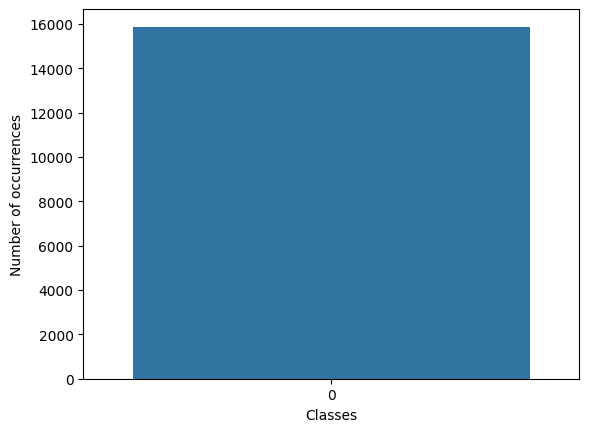

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(dataset.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.countplot(train.iloc[:,1])
# plt.xlabel('Classes')
# plt.ylabel('Number of occurrences')
# plt.show()

In [ ]:
test['Class'].unique()

array([0, 1])

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(test.iloc[:,1])
# plt.xlabel('Classes')
# plt.ylabel('Number of occurrences')
# plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.utils import to_categorical

# Prétraitement des données textuelles
max_features = 1000  # Nombre maximal de mots à utiliser comme features
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train['Tweet'].values)  # 'text' est la colonne contenant les données textuelles

# Convertir le texte en séquences d'entiers
X_train = tokenizer.texts_to_sequences(train['Tweet'].values)
X_train = pad_sequences(X_train)

# Convertir les labels en one-hot encoding
y_train = to_categorical(train['Class'].values)

# Création du modèle LSTM
embedding_size = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))  # 2 classes : Non-Offensive et Offensive

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
batch_size = 32
model.fit(X_train, y_train, epochs=7, batch_size=batch_size, verbose=2)


Epoch 1/7
397/397 - 721s - loss: 0.5166 - accuracy: 0.7609 - 721s/epoch - 2s/step
Epoch 2/7
397/397 - 677s - loss: 0.4278 - accuracy: 0.8110 - 677s/epoch - 2s/step
Epoch 3/7
397/397 - 673s - loss: 0.4007 - accuracy: 0.8232 - 673s/epoch - 2s/step
Epoch 4/7
397/397 - 672s - loss: 0.3836 - accuracy: 0.8327 - 672s/epoch - 2s/step
Epoch 5/7
397/397 - 670s - loss: 0.3708 - accuracy: 0.8348 - 670s/epoch - 2s/step
Epoch 6/7
397/397 - 634s - loss: 0.3550 - accuracy: 0.8432 - 634s/epoch - 2s/step
Epoch 7/7
397/397 - 629s - loss: 0.3467 - accuracy: 0.8428 - 629s/epoch - 2s/step


It is important to make sure that all sets have similar distribution of classes as it the case in this example. We will also need to convert the lbels from categorical type to numeric type.

In [ ]:
# convert labels from categorical to numeric
label_map = {
    'Non-Offensive' : 0,
    'Offensive': 1,

}

train['Offensive'] = train['Class'].apply(lambda x: label_map[x])
test['Offensive'] = test['Class'].apply(lambda x: label_map[x])


In [ ]:
train['Class'].head()

We only need the fully preprocessed text and the numeric label to be passed to the next step.

# **Step 5: Classification Model Development**

During this step, the classifier is created using the training set and is used to predict the labels of the testing set. For the purpose of this workshop, we only develop one traditional machine learning classifier, which is the logistic regression.

In [ ]:
# required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


# Feature extraction
train_feature = train.text
train_target = train.Offensive

test_feature = test.text
test_target = test.Offensive

# make pipeline
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression())

# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(train_feature,train_target)

# make prediction and print accuracy
prediction = model.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))


# **Step 6: Performance Evaluation**

In [ ]:
# make prediction and print accuracy
prediction = model.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))

In [ ]:
import joblib

In [ ]:
# from sklearn.externals import joblib

# Save the trained model to a file
joblib.dump(model, 'text_classification_model.pkl')

In [ ]:
# Load the saved model
loaded_model = joblib.load('text_classification_model.pkl')




In [ ]:
# Assuming you have a single text sample
new_data = ['شباب غلط شبابن ال عايش امر شوه صور اسلام عرب']  # Enclose the text in a list

# Use the loaded model to make predictions on new data
new_predictions = loaded_model.predict(new_data)

# Print the predictions
print(new_predictions)


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Assuming you have the training data available: train_feature

# # Initialize and fit the TfidfVectorizer
# vectorizer = TfidfVectorizer()
# vectorizer.fit(train_feature)



# # Use the loaded model to predict the class
# prediction = loaded_model.predict(sentence_to_test)

# # Interpret the prediction
# if prediction == 0:
#     print("The sentence is Offensive")
# elif prediction == 1:
#     print("The sentence is Non-Offensive")
# elif prediction == 2:
#     print("The sentence is a Dispute")
# else:
#     print("The predicted class is not recognized")


# **Step 7: Error Analysis**

In this example, manual error analysis conduced by personal inspection is the technique we recommend for beginners in text classification. Checking the misclassified tweets from each class can help to detect sources of noise and items that are difficult to understand for the classification model.  

In [ ]:
# printing misclassified normal samples
test['Prediction'] = prediction
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]
normal_error

In [ ]:
# printing misclassified abusive samples
test['Prediction'] = prediction
abusive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]
abusive_error

In [ ]:
# printing misclassified hate samples
test['Prediction'] = prediction
hate_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 2)]
hate_error

You can download each tables of misclassified samples as the following to further investigate the content. You might receive a prompt message from Google Colab to allow for multiple file's downloads.

In [ ]:
from google.colab import files

normal_error.to_csv('normal_error.csv', encoding = 'utf-8-sig')
files.download('normal_error.csv')

abusive_error.to_csv('abusive_error.csv', encoding = 'utf-8-sig')
files.download('abusive_error.csv')

hate_error.to_csv('hate_error.csv', encoding = 'utf-8-sig')
files.download('hate_error.csv')